In [ ]:
import pandas as pd
import numpy as np


In [ ]:
import seaborn as sns
import pandas as pd
df = sns.load_dataset('titanic')
print (df.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


1. Remover valores ausentes da coluna embarked e substituí-los pela moda.


In [2]:
import seaborn as sns
import pandas as pd

# Carregar o dataset Titanic do Seaborn
df = sns.load_dataset('titanic')

# Mostrar as primeiras linhas do dataset
print(df.head())

# Verificar a quantidade de valores ausentes na coluna 'embarked'
print("\nValores ausentes antes da substituição:")
print(df['embarked'].isnull().sum())

# Substituir os valores ausentes pela moda (valor mais frequente)
moda_embarked = df['embarked'].mode()[0]
df['embarked'].fillna(moda_embarked, inplace=True)

# Verificar se os valores ausentes foram removidos
print("\nValores ausentes após a substituição:")
print(df['embarked'].isnull().sum())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Valores ausentes antes da substituição:
2

Valores ausentes após a substituição:
0


2. Criar gráficos de contagem para as variáveis pclass e survived

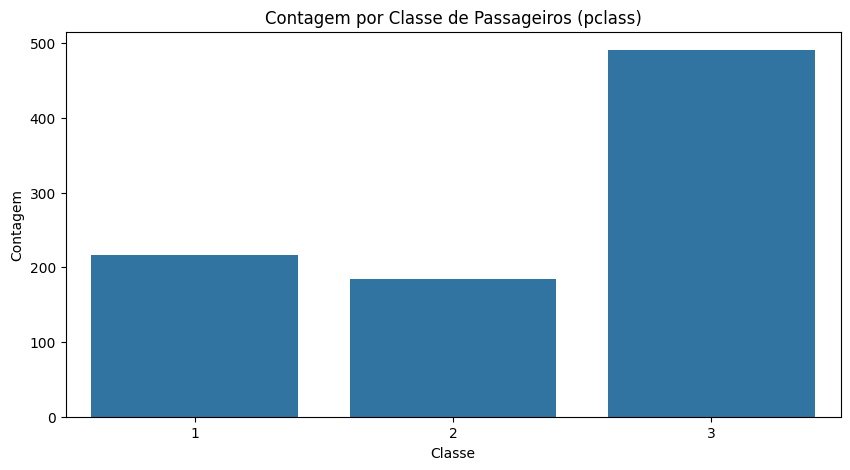

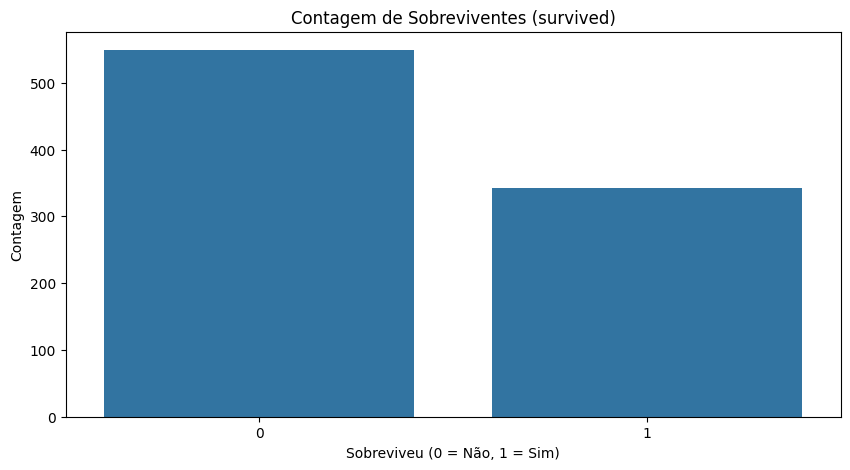

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico de contagem para a variável 'pclass'
plt.figure(figsize=(10, 5))
sns.countplot(x='pclass', data=df)
plt.title('Contagem por Classe de Passageiros (pclass)')
plt.xlabel('Classe')
plt.ylabel('Contagem')
plt.show()

# Gráfico de contagem para a variável 'survived'
plt.figure(figsize=(10, 5))
sns.countplot(x='survived', data=df)
plt.title('Contagem de Sobreviventes (survived)')
plt.xlabel('Sobreviveu (0 = Não, 1 = Sim)')
plt.ylabel('Contagem')
plt.show()


3. Aplicar o RobustScaler nas colunas age e fare.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.preprocessing import RobustScaler

# Carregar o dataset Titanic do Seaborn
df = sns.load_dataset('titanic')

# Verificar se há valores ausentes nas colunas 'age' e 'fare'
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# Criar uma instância do RobustScaler
scaler = RobustScaler()

# Aplicar o RobustScaler nas colunas 'age' e 'fare'
df[['age_scaled', 'fare_scaled']] = scaler.fit_transform(df[['age', 'fare']])

# Exibir as primeiras linhas para ver o resultado
print(df[['age', 'fare', 'age_scaled', 'fare_scaled']].head())


    age     fare  age_scaled  fare_scaled
0  22.0   7.2500   -0.461538    -0.312011
1  38.0  71.2833    0.769231     2.461242
2  26.0   7.9250   -0.153846    -0.282777
3  35.0  53.1000    0.538462     1.673732
4  35.0   8.0500    0.538462    -0.277363


4. Criar um gráfico de dispersão entre fare e age, separado por sexo e classe.

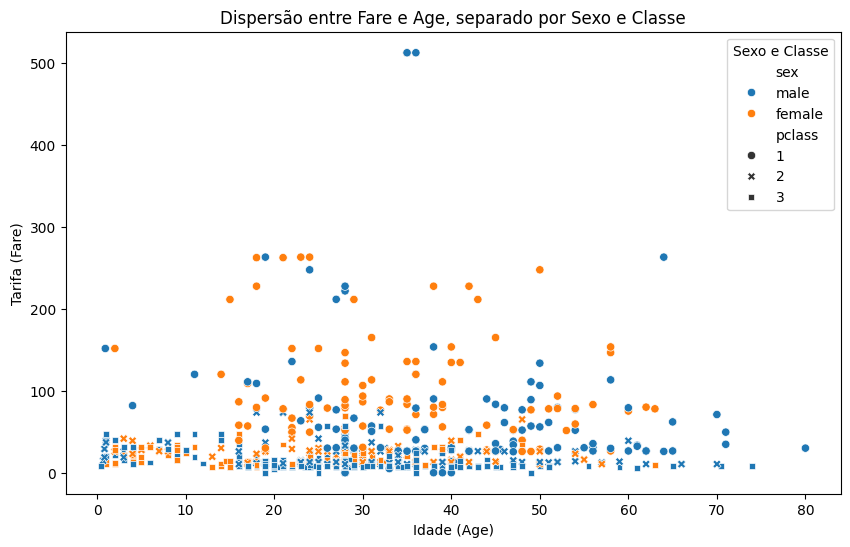

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset Titanic do Seaborn
df = sns.load_dataset('titanic')

# Preencher valores ausentes em 'age' e 'fare' com a mediana
df['age'].fillna(df['age'].median(), inplace=True)
df['fare'].fillna(df['fare'].median(), inplace=True)

# Criar o gráfico de dispersão entre 'fare' e 'age', separado por sexo e classe
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='fare', hue='sex', style='pclass', data=df)

# Título e rótulos
plt.title('Dispersão entre Fare e Age, separado por Sexo e Classe')
plt.xlabel('Idade (Age)')
plt.ylabel('Tarifa (Fare)')
plt.legend(title='Sexo e Classe')
plt.show()


5. Criar um boxplot da variável age separada por pclass e survived

In [1]:
import matplotlib.pyplot as plt
dados = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 60]

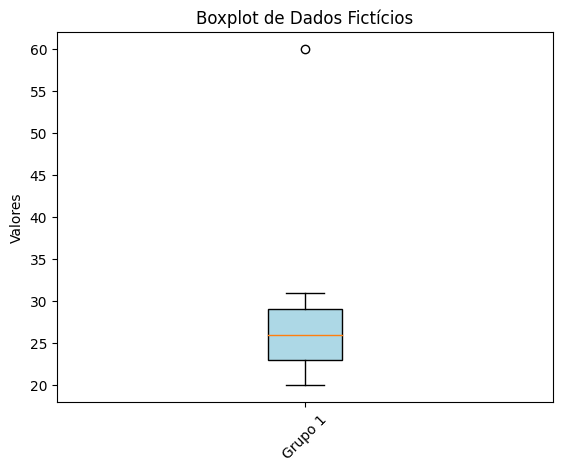

In [ ]:
import matplotlib.pyplot as plt

dados = [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 60]

plt.boxplot(dados, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Boxplot de Dados Fictícios')
plt.ylabel('Valores')
plt.xticks([1], ['Grupo 1'], rotation=45) # Rotaciona o rótulo do eixo x
plt.show()

6. Detectar e remover outliers da coluna age.

In [ ]:
import seaborn as sns
import pandas as pd

# Carregar o dataset Titanic do Seaborn
df = sns.load_dataset('titanic')

# Preencher valores ausentes em 'age' com a mediana
df['age'].fillna(df['age'].median(), inplace=True)

# Calcular Q1 (primeiro quartil) e Q3 (terceiro quartil) da coluna 'age'
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

# Definir limites para detectar os outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detectar outliers
outliers = df[(df['age'] < lower_bound) | (df['age'] > upper_bound)]
print("Outliers detectados:")
print(outliers[['age']])

# Remover outliers
df_without_outliers = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

# Verificar o DataFrame sem os outliers
print("\nDataFrame sem outliers na coluna 'age':")
print(df_without_outliers[['age']].describe())


Outliers detectados:
       age
7     2.00
11   58.00
15   55.00
16    2.00
33   66.00
..     ...
827   1.00
829  62.00
831   0.83
851  74.00
879  56.00

[66 rows x 1 columns]

DataFrame sem outliers na coluna 'age':
              age
count  825.000000
mean    28.515152
std     10.177256
min      3.000000
25%     22.000000
50%     28.000000
75%     34.000000
max     54.000000


7. Criar um gráfico de barras mostrando a média da idade por sexo e classe.

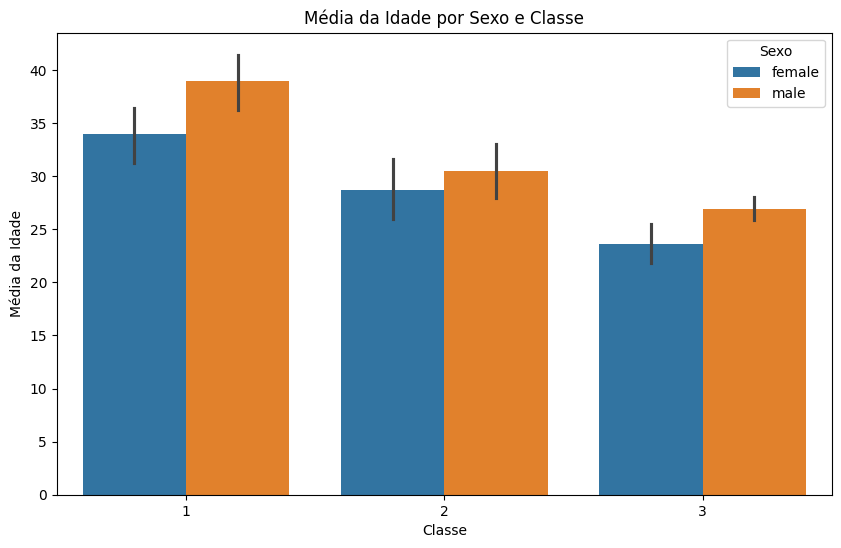

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Carregar o dataset Titanic do Seaborn
df = sns.load_dataset('titanic')

# Preencher valores ausentes em 'age' com a mediana
df['age'].fillna(df['age'].median(), inplace=True)

# Criar o gráfico de barras mostrando a média da idade por sexo e classe
plt.figure(figsize=(10, 6))
sns.barplot(x='pclass', y='age', hue='sex', data=df, estimator=lambda x: x.mean())

# Título e rótulos
plt.title('Média da Idade por Sexo e Classe')
plt.xlabel('Classe')
plt.ylabel('Média da Idade')
plt.legend(title='Sexo')

# Mostrar o gráfico
plt.show()


8. Aplicar One-hot encoding na variável pclass.

In [3]:
import pandas as pd

# Suponha que temos o seguinte DataFrame com a variável pclass
data = {
    'pclass': [1, 2, 3, 1, 3, 2, 1, 3]
}

df = pd.DataFrame(data)

# Aplicar o One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['pclass'], prefix='pclass')

# Exibir o DataFrame original e o DataFrame com One-Hot Encoding
print("DataFrame Original:")
print(df)

print("\nDataFrame com One-Hot Encoding:")
print(df_encoded)


DataFrame Original:
   pclass
0       1
1       2
2       3
3       1
4       3
5       2
6       1
7       3

DataFrame com One-Hot Encoding:
   pclass_1  pclass_2  pclass_3
0      True     False     False
1     False      True     False
2     False     False      True
3      True     False     False
4     False     False      True
5     False      True     False
6      True     False     False
7     False     False      True


9. Criar gráficos de dispersão para as variáveis fare, age e pclass usando
pairplot.

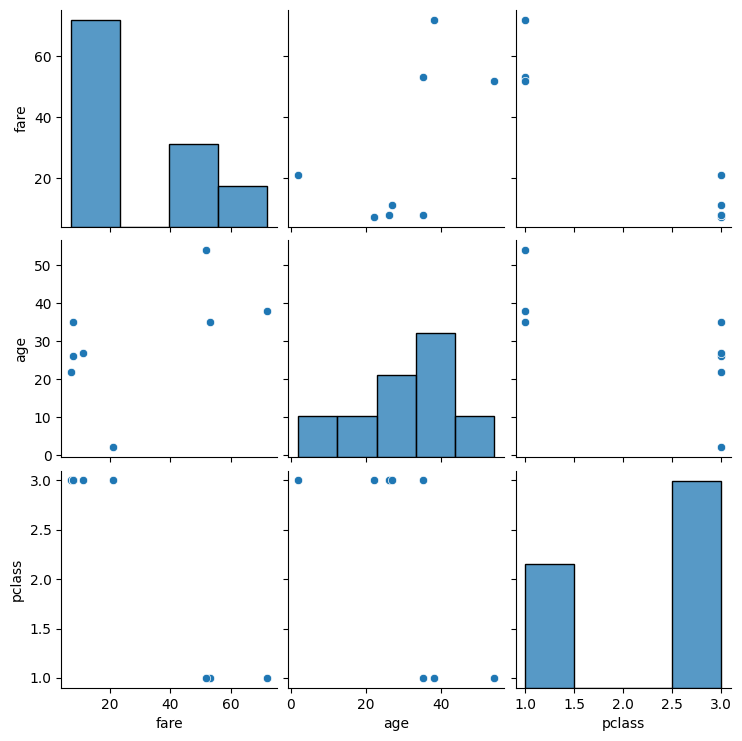

In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Criando um DataFrame com as variáveis fare, age e pclass
data = {
    'fare': [7.25, 71.83, 8.05, 53.1, 8.05, 51.86, 21.07, 11.13],
    'age': [22, 38, 26, 35, 35, 54, 2, 27],
    'pclass': [3, 1, 3, 1, 3, 1, 3, 3]
}

df = pd.DataFrame(data)

# Criar o pairplot para as variáveis fare, age e pclass
sns.pairplot(df, vars=['fare', 'age', 'pclass'])

# Exibir o gráfico
plt.show()


10. Usar o método train test split() para dividir os dados em treino (70%)
e teste (30%).


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Exemplo de DataFrame com algumas variáveis
data = {
    'fare': [7.25, 71.83, 8.05, 53.1, 8.05, 51.86, 21.07, 11.13],
    'age': [22, 38, 26, 35, 35, 54, 2, 27],
    'pclass': [3, 1, 3, 1, 3, 1, 3, 3]
}

df = pd.DataFrame(data)

# Definir X (variáveis independentes) e y (variável alvo)
X = df[['fare', 'age', 'pclass']]  # Aqui estão as variáveis preditoras
y = [0, 1, 0, 1, 0, 1, 0, 0]  # Exemplo de variável alvo (pode ser um rótulo binário ou outro)

# Dividir os dados em treino (70%) e teste (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Exibir os dados de treino e teste
print("Dados de Treino (X_train):")
print(X_train)

print("\nDados de Teste (X_test):")
print(X_test)

print("\nRótulos de Treino (y_train):")
print(y_train)

print("\nRótulos de Teste (y_test):")
print(y_test)


Dados de Treino (X_train):
    fare  age  pclass
7  11.13   27       3
2   8.05   26       3
4   8.05   35       3
3  53.10   35       1
6  21.07    2       3

Dados de Teste (X_test):
    fare  age  pclass
1  71.83   38       1
5  51.86   54       1
0   7.25   22       3

Rótulos de Treino (y_train):
[0, 0, 0, 1, 0]

Rótulos de Teste (y_test):
[1, 1, 0]
